In [4]:
%pip install sklearn
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt

#Read in data
raw_train_set = pd.read_csv('xu3_dataset.csv')
raw_bs_test = pd.read_csv('xu3_blackscholes.csv')
raw_bt_test = pd.read_csv('xu3_bodytrack.csv')
label_map = {'idle': 0, 'active': 1}
data = {'train':raw_train_set, 'test_bt':raw_bt_test, 'test_bs':raw_bs_test}
raw_train_set

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,3.844,1.157646,0.039474,0.123132,0.035380,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5411,3.851,1.157646,0.038514,0.123132,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5412,3.851,1.156364,0.041310,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5413,3.851,1.158024,0.037638,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000


In [33]:
#Parse data 
for k, v in data.items():
    data[k]['class'] =\
    data[k]['w_big'].apply((lambda x: 1 if x > 1 else 0))
print(f"bodytrack shape:{data['test_bt'].shape}")
print(f"blackscholes shape:{data['test_bs'].shape}")

bodytrack shape:(1454, 16)
blackscholes shape:(1653, 16)


In [3]:
# search possible classifiers for good one to optimize
X = data['train'].loc[:,'w_little':'freq_big_cluster'].values
X = StandardScaler().fit_transform(X)
Y = data['train']['class'].values
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "LinearSVC", 'SGD']
skip = []
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=20),
    RandomForestClassifier(max_depth=100, n_estimators=10, max_features=10),
    MLPClassifier(alpha=1, max_iter=10000, hidden_layer_sizes=(100,)),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearSVC(C=10.6),
    SGDClassifier()]
test_sets =  ['test_bt','test_bs']

X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=.1, random_state=42)

for name, model in zip(names, classifiers):
    
    print(name)

    model.fit(X_train, y_train)
   
    for t_set in test_sets:
        t_X = data[t_set].loc[:,'w_little':'freq_big_cluster'].values
        t_Y = data[t_set]['class'].values
        t_X = StandardScaler().fit_transform(t_X)
        score = model.score(X_test, y_test)
        result = model.score(t_X, t_Y)
        print(f'{t_set} score:{result}')

    del model


Nearest Neighbors
test_bt score:0.905777166437414
test_bs score:0.7985480943738656
Linear SVM
test_bt score:0.8789546079779917
test_bs score:0.7967332123411979
RBF SVM
test_bt score:0.624484181568088
test_bs score:0.6642468239564429
Decision Tree
test_bt score:0.9257221458046767
test_bs score:0.7719298245614035
Random Forest
test_bt score:0.9387895460797799
test_bs score:0.7737447065940714
Neural Net
test_bt score:0.8253094910591472
test_bs score:0.7743496672716274
AdaBoost
test_bt score:0.9442916093535075
test_bs score:0.7658802177858439
Naive Bayes
test_bt score:0.8535075653370013
test_bs score:0.7737447065940714
LinearSVC
test_bt score:0.9408528198074277
test_bs score:0.8045977011494253
SGD
test_bt score:0.9387895460797799
test_bs score:0.7828191167574108


/home/jdeutsch/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
# we choose the AdaBoost classifier to optimize
# and define the hyperparameter space to conduct our search
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": np.arange(1, 20),
              "learning_rate": np.linspace(0.01, 1)
             }

In [13]:
#execute hyperparameter search, saving our best model as we go
top_bs = 0
best_bs = {}
top_bt = 0 
best_bt = {}
for i in param_grid['base_estimator__criterion']:
    for j in param_grid['base_estimator__splitter']:
        for k in param_grid["learning_rate"]:
            for l in param_grid['n_estimators']:
                results = [0,0]
                cur = {'c':i, 's':j, 'l':k, 'n': l }
                #DTC =KNeighborsClassifier(i)

                DTC = DecisionTreeClassifier(random_state = 11, max_depth = None, 
                                criterion =i, 
                                splitter=j 
                )
                model = AdaBoostClassifier(base_estimator=DTC, learning_rate=k, n_estimators=l)
                model.fit(X_train, y_train)
                for t_set in test_sets:
                    t_X = data[t_set].loc[:,'w_little':'freq_big_cluster'].values
                    t_Y = data[t_set]['class'].values
                    t_X = StandardScaler().fit_transform(t_X)
                    score = model.score(X_test, y_test)
                    result = model.score(t_X, t_Y)
                    if t_set == "test_bt":
                        results[0] = result
                    else:
                        results[1] = result
                    if t_set == "test_bt" and result> top_bt:
                        top_bt = result
                        best_bt = cur
                        print(f'{i} {t_set} test_score:{score}, train_score:{result}') 
                        print(cur)
                        
                        pickle.dump(model, open("bt_best.pickle", 'wb'))
                    if t_set == "test_bs" and result> top_bs:
                        top_bs = result
                        best_bs = cur
                        print(f'{i} {t_set} test_score:{score}, train_score:{result}') 
                        print(cur)
                        
                        pickle.dump(model, open(f"bs_best.pickle", 'wb'))
                worst = int(min(results)*100)
                pickle.dump(model, open(f"best_{worst}.pickle", 'wb'))

gini test_bt test_score:1.0, train_score:0.9257221458046767
{'c': 'gini', 's': 'best', 'l': 0.01, 'n': 1}
gini test_bs test_score:1.0, train_score:0.7719298245614035
{'c': 'gini', 's': 'best', 'l': 0.01, 'n': 1}
gini test_bt test_score:1.0, train_score:0.9394773039889959
{'c': 'gini', 's': 'best', 'l': 0.01, 'n': 2}
gini test_bs test_score:1.0, train_score:0.7761645493042952
{'c': 'gini', 's': 'best', 'l': 0.01, 'n': 2}
gini test_bt test_score:1.0, train_score:0.9669876203576341
{'c': 'gini', 's': 'random', 'l': 0.01, 'n': 1}
gini test_bs test_score:1.0, train_score:0.7876588021778584
{'c': 'gini', 's': 'random', 'l': 0.01, 'n': 1}
gini test_bs test_score:1.0, train_score:0.7931034482758621
{'c': 'gini', 's': 'random', 'l': 0.01, 'n': 3}
gini test_bt test_score:1.0, train_score:0.9738651994497937
{'c': 'gini', 's': 'random', 'l': 0.01, 'n': 5}
gini test_bs test_score:1.0, train_score:0.794313369630974
{'c': 'gini', 's': 'random', 'l': 0.01, 'n': 7}
gini test_bt test_score:1.0, train_sc

confusion matrix for bodytrack:
 [[529  17]
 [  1 907]]

bodytrack score:0.9876203576341128


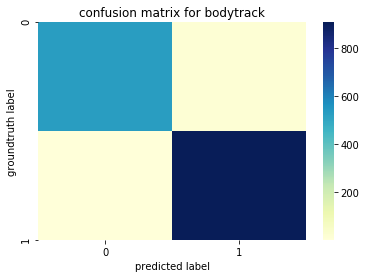

confusion matrix for blackscholes:
 [[ 548    7]
 [  25 1073]]

blackscholes score:0.9806412583182094


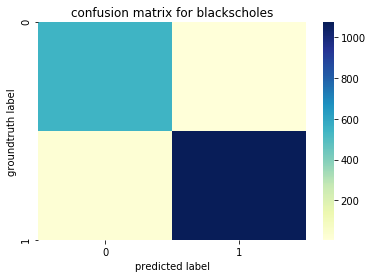

In [45]:
import seaborn as sn
# run our best classifiers for each dataset
model = pickle.load(open("bt_best.pickle", 'rb'))
for t_set in test_sets:
    t_X = data[t_set].loc[:,'w_little':'freq_big_cluster'].values
    t_Y = data[t_set]['class'].values
    t_X = StandardScaler().fit_transform(t_X)
    result = model.score(t_X, t_Y)
    y_pred = model.predict(t_X)
    confusion = confusion_matrix(t_Y, y_pred)
    name= "blackscholes" if t_set=="test_bs" else "bodytrack"
    ax = plt.axes()
    print(f'confusion matrix for {name}:\n {confusion}\n')
    
    
    print(f'{name} score:{result}')
    akws = {"ha": 'left',"va": 'top'}
    sn.heatmap(confusion, cmap="YlGnBu", ax= ax)
    ax.set_title(f'confusion matrix for {name}')
    ax.set_ylabel(f'groundtruth label')
    ax.set_xlabel('predicted label')
    plt.show()


confusion matrix for bodytrack:
 [[529  17]
 [  1 907]]

bodytrack score:0.9876203576341128


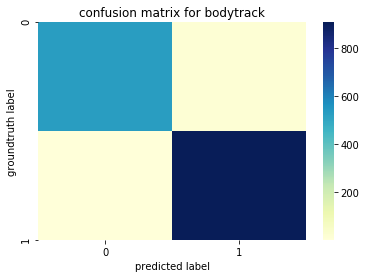

confusion matrix for blackscholes:
 [[ 548    7]
 [  25 1073]]

blackscholes score:0.9806412583182094


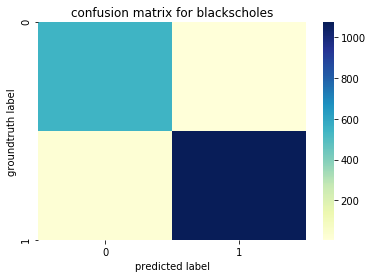

In [47]:
model = pickle.load(open("bs_best.pickle", 'rb'))
for t_set in test_sets:
    t_X = data[t_set].loc[:,'w_little':'freq_big_cluster'].values
    t_Y = data[t_set]['class'].values
    t_X = StandardScaler().fit_transform(t_X)
    result = model.score(t_X, t_Y)
    y_pred = model.predict(t_X)
    confusion = confusion_matrix(t_Y, y_pred)
    name= "blackscholes" if t_set=="test_bs" else "bodytrack"
    ax = plt.axes()
    print(f'confusion matrix for {name}:\n {confusion}\n')
    
    
    print(f'{name} score:{result}')
    akws = {"ha": 'left',"va": 'top'}
    sn.heatmap(confusion, cmap="YlGnBu", ax= ax)
    ax.set_title(f'confusion matrix for {name}')
    ax.set_ylabel(f'groundtruth label')
    ax.set_xlabel('predicted label')
    plt.show()



In [15]:
# as you can see we achieve 98% accuracy on both test sets!
#the final features of the model were ADABOOST with a DecisionTree base
# estimator, for the DecisionTree the splitter was random and the criterion
# was entropy. for the adaboostclassifier we used 18 estimators &
# a learning rate of 0.95959

In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# for our regressor we attempt to optimize the adaboostregressor
#Read in data
raw_train_set = pd.read_csv('xu3_dataset.csv')
raw_bs_test = pd.read_csv('xu3_blackscholes.csv')
raw_bt_test = pd.read_csv('xu3_bodytrack.csv')
data = {'train':raw_train_set, 'test_bt':raw_bt_test, 'test_bs':raw_bs_test}


X = data['train'].loc[:,'w_little':'temp_gpu'].values
print(f'training data X shape{X.shape}')
X = StandardScaler().fit_transform(X)
Y = data['train']['w_big'].values
print(f'training data y shape{Y.shape}')
test_sets =  ['test_bt','test_bs']

print(f"bodytrack shape:{data['test_bt'].shape}")
print(f"blackscholes shape:{data['test_bs'].shape}")

X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=.1, random_state=42)

training data X shape(5415, 12)
training data y shape(5415,)
bodytrack shape:(1454, 15)
blackscholes shape:(1653, 15)


In [31]:
param_grid = {"base_estimator__criterion" : ["linear", "square", "exponential"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": np.arange(1, 4),
              "learning_rate": np.linspace(0.3, 1.5, 100)
             }

top_bs = 10000
best_bs = {}
top_bt = 10000
best_bt = {}
for i in param_grid['base_estimator__criterion']:
    for j in param_grid['base_estimator__splitter']:
        for k in param_grid["learning_rate"]:
            for l in param_grid['n_estimators']:
                results = [0,0]
                cur = {'c':i, 's':j, 'l':k, 'n': l }
                #DTC =KNeighborsClassifier(i)

                DTC = DecisionTreeRegressor(random_state = 11, max_depth = None, 
                                criterion ="mse", 
                                splitter=j 
                )
                model = AdaBoostRegressor(base_estimator=DTC, learning_rate=k, n_estimators=l, loss=i)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = mean_squared_error(y_test, y_pred)
                for t_set in test_sets:
                    t_X = data[t_set].loc[:,'w_little':'temp_gpu'].values
                    t_Y = data[t_set]['w_big'].values
                    t_X = StandardScaler().fit_transform(t_X)
                    result = mean_squared_error(t_Y, model.predict(t_X))
                    
                    if t_set == "test_bt":
                        results[0] = result
                    else:
                        results[1] = result
                    if t_set == "test_bt" and result< top_bt:
                        top_bt = result
                        best_bt = cur
                        print(f'{t_set} train_score:{score}, test_score:{result}') 
                        print(cur)
                        
                        pickle.dump(model, open("r_bt_best.pickle", 'wb'))
                    if t_set == "test_bs" and result< top_bs:
                        top_bs = result
                        best_bs = cur
                        print(f'{t_set} train_score:{score}, test_score:{result}') 
                        print(cur)
                        
                        pickle.dump(model, open(f"r_bs_best.pickle", 'wb'))
                worst = int(max(results)*100)
                pickle.dump(model, open(f"r_best_{worst}.pickle", 'wb'))

test_bt train_score:0.004900289112370627, test_score:2.584207579284114
{'c': 'linear', 's': 'best', 'l': 0.3, 'n': 1}
test_bs train_score:0.004900289112370627, test_score:1.394352893448151
{'c': 'linear', 's': 'best', 'l': 0.3, 'n': 1}
test_bt train_score:0.01711428612797359, test_score:1.7095984890638891
{'c': 'linear', 's': 'best', 'l': 0.3, 'n': 2}
test_bs train_score:0.01711428612797359, test_score:0.4185315559772061
{'c': 'linear', 's': 'best', 'l': 0.3, 'n': 2}
test_bt train_score:0.010916495963480155, test_score:1.6699622274529164
{'c': 'linear', 's': 'best', 'l': 0.40909090909090906, 'n': 2}
test_bs train_score:0.004615470595393748, test_score:0.39288942025854995
{'c': 'linear', 's': 'best', 'l': 0.4939393939393939, 'n': 1}
test_bt train_score:0.009609903539511086, test_score:1.4520647397753728
{'c': 'linear', 's': 'best', 'l': 0.5909090909090908, 'n': 2}
test_bs train_score:0.022931043609665445, test_score:0.3837576979769646
{'c': 'linear', 's': 'best', 'l': 0.6878787878787879

In [37]:
model = pickle.load(open("r_bt_best.pickle", 'rb'))
for t_set in test_sets:
    name= "blackscholes" if t_set=="test_bs" else "bodytrack"
    t_X = data[t_set].loc[:,'w_little':'temp_gpu'].values
    t_Y = data[t_set]['w_big'].values
    t_X = StandardScaler().fit_transform(t_X)
    y_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_test, y_pred)
    result = mean_squared_error(t_Y, model.predict(t_X))
    print(f"mse for {name}: {result}")
    print(f"train mse for {name}: {train_mse}")

mse for bodytrack: 0.3323279648734418
train mse for bodytrack: 0.00842702410500436
mse for blackscholes: 0.29794509469723074
train mse for blackscholes: 0.00842702410500436


In [36]:
model = pickle.load(open("r_bs_best.pickle", 'rb'))
for t_set in test_sets:
    name= "blackscholes" if t_set=="test_bs" else "bodytrack"
    t_X = data[t_set].loc[:,'w_little':'temp_gpu'].values
    t_Y = data[t_set]['w_big'].values
    t_X = StandardScaler().fit_transform(t_X)
    y_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_test, y_pred)
    result = mean_squared_error(t_Y, model.predict(t_X))
    print(f"mse for {name}: {result}")
    print(f"train mse for {name}: {train_mse}")

mse for bodytrack: 0.7540022117383436
train mse for bodytrack: 0.012825665197564035
mse for blackscholes: 0.057739809032336394
train mse for blackscholes: 0.012825665197564035


In [ ]:
# our best results were an mse of 0.75 for bodytrack and 0.058 for blackscholes
# the model was an Adaboostregressor with a decisionTree baseestimator using a square loss function, 
#random splitter, learning rate of 0.48 and 2 estimators